<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [28]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [29]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [30]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [31]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


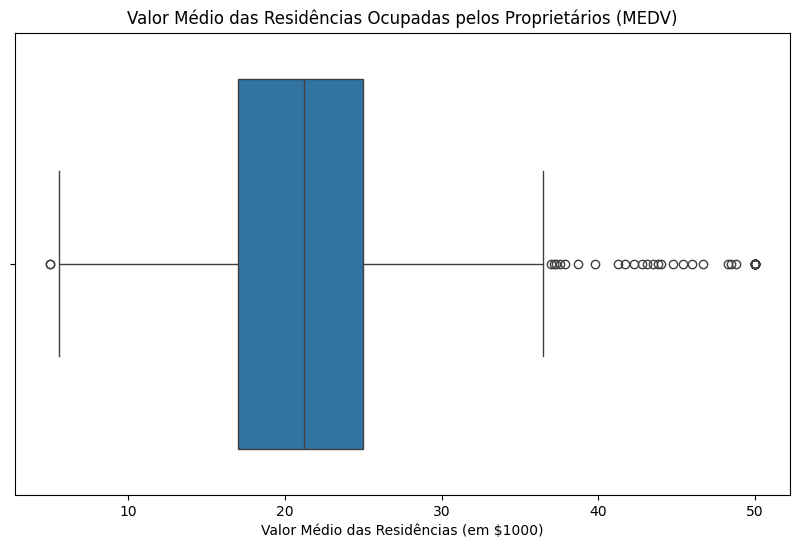

In [32]:
# Boxplot para o "Median value of owner-occupied homes" (MEDV)
pyplot.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Valor Médio das Residências Ocupadas pelos Proprietários (MEDV)')
pyplot.xlabel('Valor Médio das Residências (em $1000)')
pyplot.show()

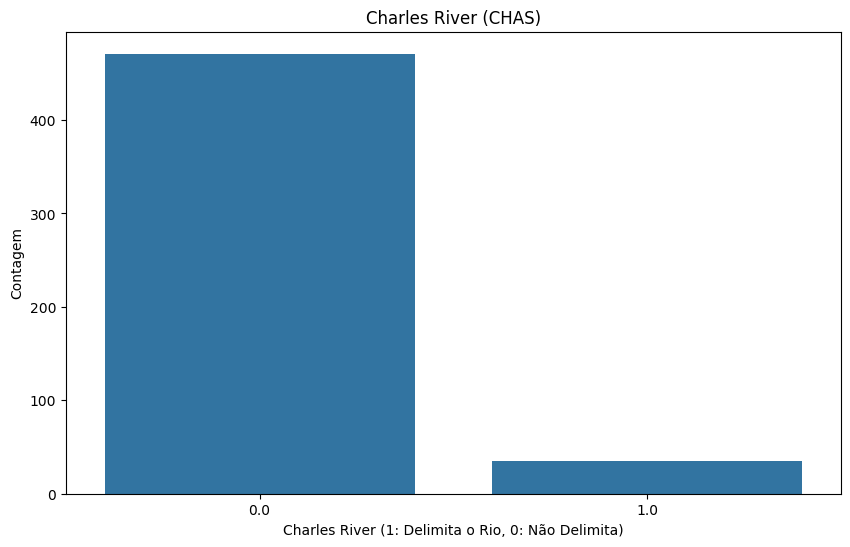

In [33]:
# Gráfico de barras para a variável Charles River (CHAS)
pyplot.figure(figsize=(10, 6))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Charles River (CHAS)')
pyplot.xlabel('Charles River (1: Delimita o Rio, 0: Não Delimita)')
pyplot.ylabel('Contagem')
pyplot.show()

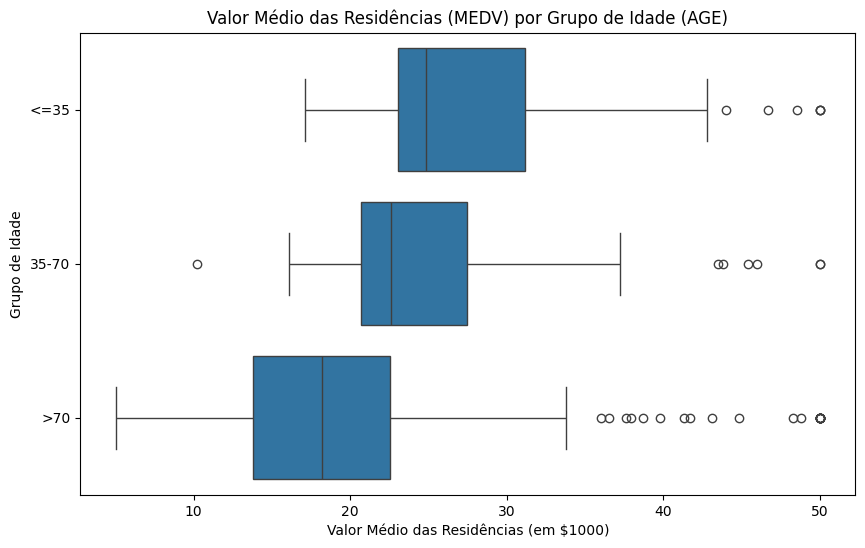

In [34]:
# Boxplot para a variável MEDV versus a variável AGE
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])

pyplot.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'], y=boston_df['AGE_group'])
pyplot.title('Valor Médio das Residências (MEDV) por Grupo de Idade (AGE)')
pyplot.xlabel('Valor Médio das Residências (em $1000)')
pyplot.ylabel('Grupo de Idade')
pyplot.show()

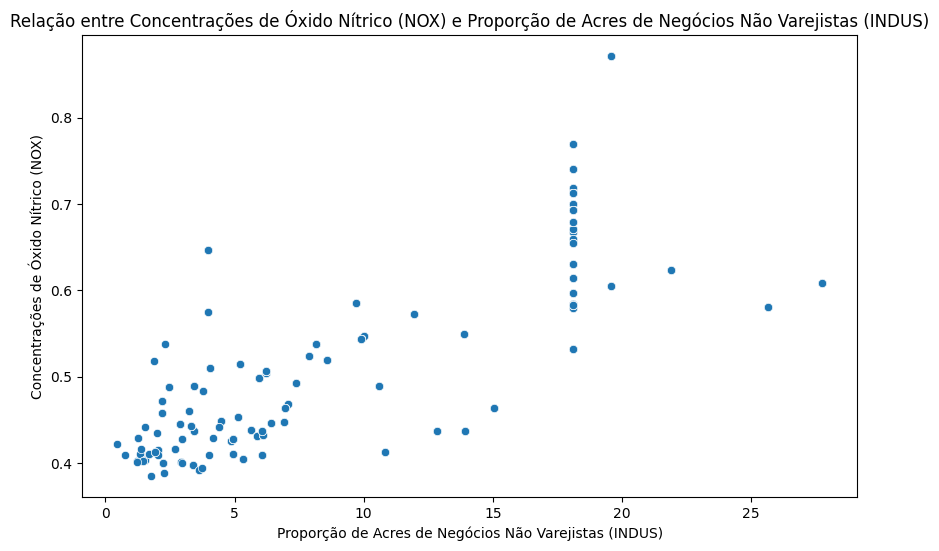

In [35]:
# Gráfico de dispersão para NOX vs INDUS
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title('Relação entre Concentrações de Óxido Nítrico (NOX) e Proporção de Acres de Negócios Não Varejistas (INDUS)')
pyplot.xlabel('Proporção de Acres de Negócios Não Varejistas (INDUS)')
pyplot.ylabel('Concentrações de Óxido Nítrico (NOX)')
pyplot.show()

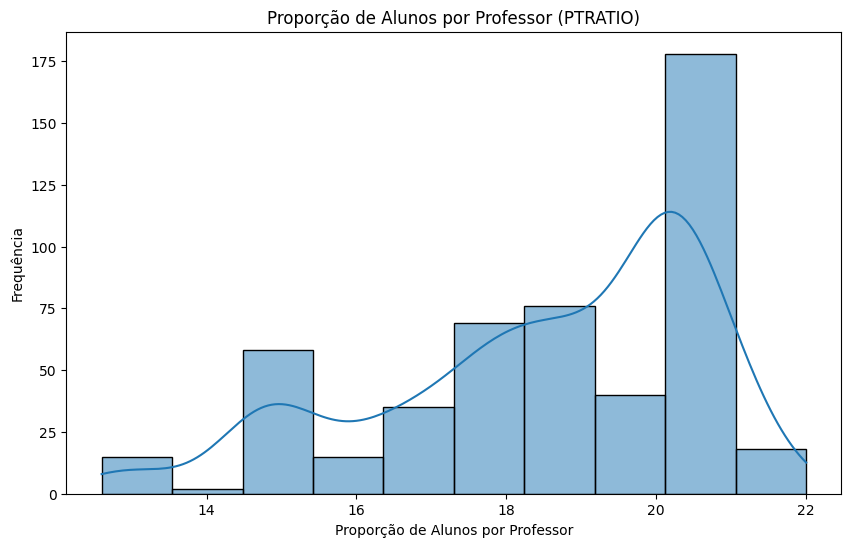

In [36]:
# Histograma para a variável de proporção de alunos por professor (PTRATIO)
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
pyplot.title('Proporção de Alunos por Professor (PTRATIO)')
pyplot.xlabel('Proporção de Alunos por Professor')
pyplot.ylabel('Frequência')
pyplot.show()

### Tests

##### 1. Existe uma diferença significativa no valor médio das casas delimitadas pelo rio Charles ou não? (Teste T para amostras independentes)

Hipótese:
- H0: Não há diferença significativa no valor médio das casas delimitadas pelo rio Charles (CHAS = 1) e as que não delimitam (CHAS = 0).
- H1: Há uma diferença significativa no valor médio das casas delimitadas pelo rio Charles (CHAS = 1) e as que não delimitam (CHAS = 0).

In [38]:
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_value = stats.ttest_ind(chas_0, chas_1)
print("Teste T para Amostras Independentes")
print(f"t-statistic: {t_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa no valor médio das casas delimitadas pelo rio Charles.")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença significativa no valor médio das casas delimitadas pelo rio Charles.")


Teste T para Amostras Independentes
t-statistic: -3.996437466090509, p-value: 7.390623170519905e-05
Rejeitamos a hipótese nula. Há uma diferença significativa no valor médio das casas delimitadas pelo rio Charles.


##### 2. Existe uma diferença no valor médio das residências (MEDV) para cada proporção de unidades ocupadas pelo proprietário construídas antes de 1940 (AGE)? (ANOVA)

Hipótese:
- H0: Não há diferença significativa no valor médio das residências (MEDV) entre os diferentes grupos de idade (AGE).
- H1: Há uma diferença significativa no valor médio das residências (MEDV) entre os diferentes grupos de idade (AGE).

In [39]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])
anova_model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("\nANOVA")
print(anova_table)
if anova_table['PR(>F)'][0] < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa no valor médio das residências entre os diferentes grupos de idade.")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença significativa no valor médio das residências entre os diferentes grupos de idade.")


ANOVA
                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


<ipython-input-39-49c42508d988>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


Rejeitamos a hipótese nula. Há uma diferença significativa no valor médio das residências entre os diferentes grupos de idade.


##### 3. Podemos concluir que não há relação entre as concentrações de óxido nítrico e a proporção de acres de negócios não varejistas por cidade? (Correlação de Pearson)

Hipótese:
- H0: Não há correlação significativa entre as concentrações de óxido nítrico (NOX) e a proporção de acres de negócios não varejistas (INDUS).
- H1: Há uma correlação significativa entre as concentrações de óxido nítrico (NOX) e a proporção de acres de negócios não varejistas (INDUS).

In [41]:
corr_coef, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nCorrelação de Pearson")
print(f"Coeficiente de Correlação: {corr_coef}, p-value: {p_value}")
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma correlação significativa entre as concentrações de óxido nítrico e a proporção de acres de negócios não varejistas.")
else:
    print("Não rejeitamos a hipótese nula. Não há correlação significativa entre as concentrações de óxido nítrico e a proporção de acres de negócios não varejistas.")


Correlação de Pearson
Coeficiente de Correlação: 0.7636514469209192, p-value: 7.913361061210442e-98
Rejeitamos a hipótese nula. Há uma correlação significativa entre as concentrações de óxido nítrico e a proporção de acres de negócios não varejistas.


##### 4. Qual é o impacto de uma distância adicional ponderada para os cinco centros de emprego de Boston sobre o valor médio das residências ocupadas pelos proprietários? (Análise de regressão)

Hipótese:
- H0: A distância adicional ponderada para os centros de emprego de Boston (DIS) não tem impacto significativo sobre o valor médio das residências (MEDV).
- H1: A distância adicional ponderada para os centros de emprego de Boston (DIS) tem impacto significativo sobre o valor médio das residências (MEDV).